# Exploratory data analysis in python of IPL dataset (from 2008-2022)

[kaggle dataset ](https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset/data)




# The Story of IPL 🏏: A Data-Driven Journey 💻

### **Introduction:** The IPL is more than just a cricket tournament; it's a spectacle of talent, strategy, and nail-biting finishes. To truly understand the dynamics of this league, we delve into the data, uncovering the secrets behind team performances, player brilliance, and the intricate impact of venues and tactics. Join us on this data-driven journey to explore the IPL.

Statistical Analyses to Perform on the IPL Dataset
Below is a list of impactful statistical analyses:

1. Exploratory Data Analysis (EDA)
Distribution of runs, wickets, boundaries, and extras per match/season.

Player-wise and team-wise performance summaries.

Venue and toss impact on match outcomes.

2. Player Performance Metrics
Batting: Average, strike rate, boundary percentage, consistency.

Bowling: Economy rate, average, strike rate, wicket-taking trends.

All-rounder indices: Combining batting and bowling metrics.

3. Team Strategy and Match Dynamics
Win/loss analysis by chasing vs. defending.

Toss decision impact.

Powerplay vs. death overs analysis.

Partnership analysis (key batting pairs, average partnership runs).

Ball-by-Ball Advanced Analytics
Momentum shifts: Run rate changes, wicket clusters.

Clutch performance: Player performance under pressure (e.g., last 5 overs, close chases).

Bowling variations: Performance by over, bowler type, or match situation.

5. Predictive & Machine Learning Models
Match Outcome Prediction: Logistic regression, random forest, or XGBoost models to predict win/loss based on match features.

Player Performance Prediction: Regression models for runs scored, wickets taken, or fantasy points.

Next Ball/Over Prediction: Sequence modeling for runs/wickets in the next ball/over.

Feature Engineering
Create new features: Recent form, head-to-head stats, venue-specific performance, player roles.

7. Visualization & Dashboarding
Interactive dashboards (Power BI, Tableau) for season summaries, player comparisons, and match highlights.

Heatmaps for scoring areas, bowler lengths, or wicket zones.

Statistical Testing
Hypothesis testing:

Is there a significant difference in win rates between teams batting first vs. second?

Do certain venues statistically favor the home team?

9. Time Series Analysis
Trends in scoring rates, boundary frequencies, or player performances across seasons.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:
project_id = 'ipl-data-analysis-465107'
dataset_id = 'ipl_data'
ipl_matches_id = 'ipl_matches'
ipl_ball_by_ball_id = 'ipl_ball_by_ball'
player_stats_id = 'player_stats'
bowler_stats_id = 'bowler_stats'

In [4]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)
print("Client creating using default project: {}".format(client.project))

Client creating using default project: ipl-data-analysis-465107


In [5]:
dataset_ref = client.dataset(dataset_id, project=project_id)
dataset = client.get_dataset(dataset_ref)

ipl_matches_table_ref = dataset.table(ipl_matches_id)
ipl_matches_table = client.get_table(ipl_matches_table_ref)

ipl_ball_by_ball = dataset.table(ipl_ball_by_ball_id)
ipl_ball_by_ball_table = client.get_table(ipl_ball_by_ball)

player_stats_table_ref = dataset.table(player_stats_id)
player_stats_table = client.get_table(player_stats_table_ref)

bowler_stats_table_ref = dataset.table(bowler_stats_id)
bowler_stats_table = client.get_table(bowler_stats_table_ref)


In [22]:
player_stats_table.schema

[SchemaField('player', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('matches_played', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('total_runs', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('fours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('sixes', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('dismissals', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('balls_faced', 'INTEGER', 'NULLABLE', None, None, (), None)]

# IPL Matches Dataset

It contains all details of the match: Venue of the match, Toss Decision, Match Winer, Man of the Match, Squads, etc.

Fields:
 - ID : Match ID given by ESPNCricinfo
 - City : City where the game was played
 - Date : Date of the match
 - Season : IPL Season
 - MatchNumber : Match Number for that IPL Season. Also for Qualifiers and Finals, the match number would be Final, Qualifier 2, Qualifier
 - Team1 : Team 1
 - Team2 : Team 2
 - Venue : Stadium
 - TossWinner : Team winning the toss
 - TossDecision : Toss decision: the toss winner either choosing field or bat

In [6]:
ipl_matches_table.schema

[SchemaField('ID', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('City', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('Date', 'DATE', 'NULLABLE', None, None, (), None),
 SchemaField('Season', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('MatchNumber', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('Team1', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('Team2', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('Venue', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('TossWinner', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('TossDecision', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('SuperOver', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('WinningTeam', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('WonBy', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('Margin', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('method', 'STRING', 'NULL

# IPL Ball By Ball Dataset

It contains ball by ball data of each and every match: Batsman on strike, Bowler, Extras, Runs, Wicket Ball, etc.

 - ID : Match ID given by ESPNCricinfo
 - innings : Inning Number 1 - 1st Inning 2 - 2nd Inning
 - overs : Over Number 0-19
 - ballnumber : Ball Number
 - batter : Batsman on Strike
 - bowler : Bowler
 - non-striker : Non-Striker Batsman
 - extra_type : If the ball is an extra, this will indicate the extra type Possible Values: byes, legbyes, wides, noballs
 - batsman_run : Run Scored by the batsman for the ball
 - extras_run : Extra runs for the ball
 - total_run : runs scored on that ball
 - boundary : indicates if boundary was scored or not (6's, 4's or wide 4's too). (1 -> boundary scored, 0 -> boundary -> no boundary was scored)
 - isWicketDelivery : Indicates if wicket was taken on this ball. 1 -> wicket taken, 0 -> no wicket delivery.
 - player_out : player name that got out.
 - kind : way the batter got out. I contains values like bowled, caught, caught and bowled, run out etc.
 - fielders_involved : players involved in wicket taking while fielding
 - BattingTeam : current batting team for that ball.

In [7]:
ipl_ball_by_ball_table.schema

[SchemaField('ID', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('innings', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('overs', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('ballnumber', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('batter', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('bowler', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('non-striker', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('extra_type', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('batsman_run', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('extras_run', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('total_run', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('boundary', 'INTEGER', 'NULLABLE', None, 'Boundary scored indication', (), None),
 SchemaField('isWicketDelivery', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('player_out', 'STRING', 'NULLABLE', N

In [8]:
# Converting BigQuery tables to pandas DataFrames
ipl_matches_df = client.list_rows(ipl_matches_table).to_dataframe()
ipl_ball_by_ball_df = client.list_rows(ipl_ball_by_ball_table).to_dataframe()
player_stats_df = client.list_rows(player_stats_table).to_dataframe()
bowler_stats_df = client.list_rows(bowler_stats_table).to_dataframe()

In [9]:
print("-------------------------IPL Matches DataFrame-----------------------")
ipl_matches_df.head()

-------------------------IPL Matches DataFrame-----------------------


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NA,NA,NoResults,NA,NA,NA,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker
1,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NA,NA,NoResults,NA,NA,NA,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
2,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NA,NA,NoResults,NA,NA,NA,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
3,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NA,NA,NoResults,NA,NA,NA,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
4,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,N,Delhi Capitals,Runs,16,NA,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan


In [10]:
print("\n---------------------IPL Ball By Ball DataFrame-------------------------")
ipl_ball_by_ball_df.head()



---------------------IPL Ball By Ball DataFrame-------------------------


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NA,NA,NA,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NA,1,0,1,0,0,NA,NA,NA,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals


In [11]:
print("\n-------------------------Player Stats DataFrame-------------------------\n")
player_stats_df.head()


-------------------------Player Stats DataFrame-------------------------



,player,matches_played,total_runs,fours,sixes,dismissals,balls_faced
0,YBK Jaiswal,23,547,61,22,23,410
1,AL Menaria,23,401,24,17,21,367
2,HH Gibbs,36,886,83,31,31,837
3,RD Gaikwad,36,1207,113,43,31,945
4,M Manhas,38,514,43,10,23,486


In [12]:
print("\n------------------------Bowler Stats DataFrame-----------------------")
bowler_stats_df.head()


------------------------Bowler Stats DataFrame-----------------------


,bowler,matches_played,total_runs,overs,fours,sixes,wickets,extras_given
0,YBK Jaiswal,1,6,0.2,0,1,0,1
1,AC Gilchrist,1,0,0.2,0,0,0,1
2,SPD Smith,1,5,0.3,1,0,0,2
3,SN Khan,1,6,0.3,1,0,0,2
4,DA Warner,1,1,0.3,0,0,0,2


## 📊 Data Exploration & Cleaning

### Handling missing values
The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis

    
 - Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column

#### Checking missing values

In [13]:
#number of missing values in each column of ipl_matches dataframe
print("Number of missing values in each column:")
ipl_matches_df.isnull().sum()


Number of missing values in each column:


,0
ID,0
City,0
Date,0
Season,0
MatchNumber,0
Team1,0
Team2,0
Venue,0
TossWinner,0
TossDecision,0


In [14]:
#number of missing values in each column of ipl_ball_by_ball dataframe
print("Number of missing values in each column:")
ipl_ball_by_ball_df.isnull().sum()

Number of missing values in each column:


,0
ID,0
innings,0
overs,0
ballnumber,0
batter,0
bowler,0
non-striker,0
extra_type,0
batsman_run,0
extras_run,0


**We observe that both dataframs have no missing values in thier columns.**


### Data Types
Verify that each column has the appropriate data type.

In [15]:
#Check the datatypes of all the columns of ipl_matches dataframe
print("Datatypes of all the columns:")
ipl_matches_df.dtypes

Datatypes of all the columns:


,0
ID,Int64
City,object
Date,dbdate
Season,object
MatchNumber,object
Team1,object
Team2,object
Venue,object
TossWinner,object
TossDecision,object


In [16]:
#Check the datatypes of all the columns of ipl_ball_by_ball dataframe
print("Datatypes of all the columns:")
ipl_ball_by_ball_df.dtypes

Datatypes of all the columns:


,0
ID,Int64
innings,Int64
overs,Int64
ballnumber,Int64
batter,object
bowler,object
non-striker,object
extra_type,object
batsman_run,Int64
extras_run,Int64


**Above dataframes have columns with appropriate datatypes.**

### Check for duplicates

In [17]:
#Check for duplicates
print("Number of duplicate rows in the dataset:",ipl_matches_df.duplicated().sum())

Number of duplicate rows in the dataset: 0


In [18]:
#Check for duplicates
print("Number of duplicate rows in the dataset:",ipl_ball_by_ball_df.duplicated().sum())

Number of duplicate rows in the dataset: 0


**There are no duplicate rows in above datasets.**

**Now the data cleaning proces has done and we are ready to Exploratory Data Analysis (EDA)**

##  Exploratory Data Analysis (EDA) 💻

EDA involves analyzing the dataset to uncover patterns, trends, and insights, often through summary statistics and visualizations. This will help us understand the data better and generate meaningful insights.

### **Analysis 1: Team Win Percentage - Unveiling Dominance**

***Question:*** What is the percentage of wins for each team across all seasons?

***How:*** By grouping the match results by team and calculating the win ratio. This answers which teams have historically been the most successful and consistent winners.

*This includes all the individual matches wins, not the finals matches wins.*


--- Analysis 1: Team Win Percentage ---
                           Team  Wins  TotalMatches  WinPercentage
13               Gujarat Titans    12            16      75.000000
14       Rising Pune Supergiant    10            16      62.500000
15         Lucknow Super Giants     9            15      60.000000
1           Chennai Super Kings   121           208      58.173077
8                Delhi Capitals    36            63      57.142857
0                Mumbai Indians   131           231      56.709957
2         Kolkata Knight Riders   114           223      51.121076
4              Rajasthan Royals    96           192      50.000000
6           Sunrisers Hyderabad    75           152      49.342105
3   Royal Challengers Bangalore   109           226      48.230088
11                 Punjab Kings    13            28      46.428571
5               Kings XI Punjab    88           190      46.315789
10                Gujarat Lions    13            30      43.333333
16         Kochi Tusk

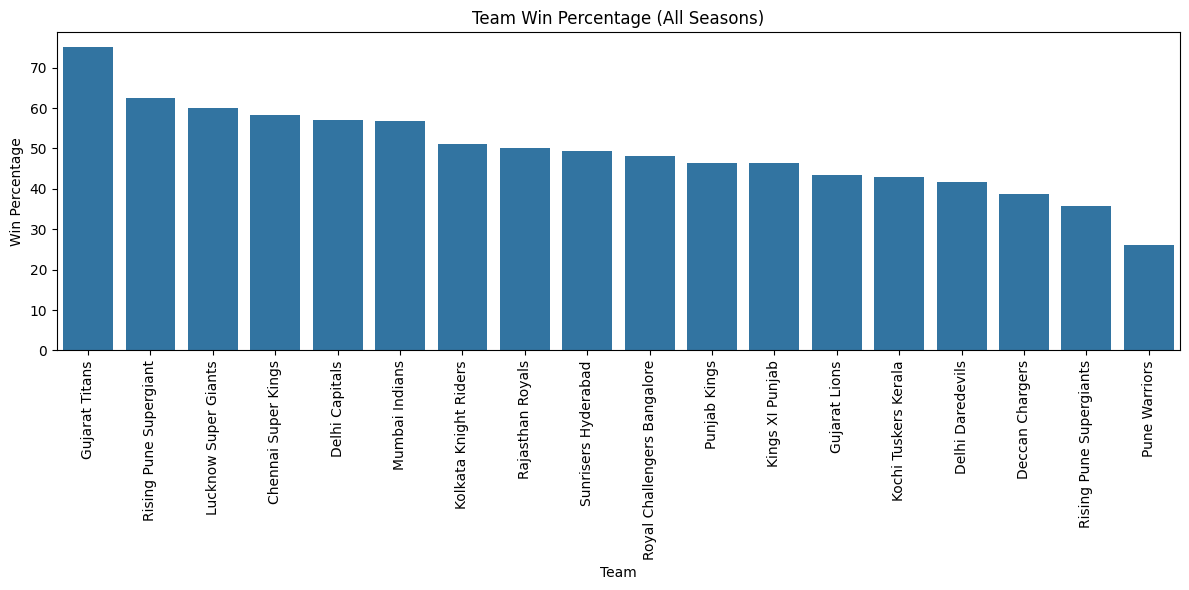

In [19]:
print("\n--- Analysis 1: Team Win Percentage ---")
team_wins = ipl_matches_df['WinningTeam'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']
total_matches_played = ipl_matches_df['Team1'].value_counts() + ipl_matches_df['Team2'].value_counts()
team_matches_df = total_matches_played.reset_index()
team_matches_df.columns = ['Team', 'TotalMatches']
team_performance = pd.merge(team_wins, team_matches_df, on='Team')
team_performance['WinPercentage'] = (team_performance['Wins'] / team_performance['TotalMatches']) * 100
team_performance = team_performance.sort_values(by='WinPercentage', ascending=False)
print(team_performance)

# Visualization for team win percentage
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='WinPercentage', data=team_performance)
plt.xticks(rotation=90)
plt.title('Team Win Percentage (All Seasons)')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.tight_layout()
plt.show()

#### **Insights**

Based on the output,the winning percentage ia also affected by the number of matches played is accurate.

While Mumbai Indians and Chennai Super Kings have won the most IPL titles, the `team_performance` DataFrame and the bar plot show the overall win percentage across *all* matches played by each team.

The insight drawn is:

**Overall Consistency vs. Finals Success:** The teams with the highest win percentages over the years (like Delhi Capitals and Rising Pune Supergiant in this specific output snippet) are not necessarily the teams that have won the most championships. This suggests that being consistently good throughout the league stage is different from being able to perform under pressure in high-stakes final matches. Teams like Mumbai Indians and CSK, despite not being at the very top in *overall* win percentage, have a proven track record of performing and winning in crucial final games, highlighting their mental fortitude and strategic prowess in knockout scenarios.


### **Analysis 2: Venue Impact on Toss Decision Outcomes - The Home Advantage?**

***Question:*** Which venues favor the team batting first and which favor the team chasing (batting second)?

***How:*** By analyzing the match outcomes for each venue and the corresponding toss
 decision and match result. This helps understand if certain venues offer a 'home advantage' or favor a particular batting strategy.


--- Analysis 2: Venue Impact on Toss Decision Outcomes ---
BattingOrderWin                             TotalMatches  \
Venue                                                      
Eden Gardens                                        77.0   
Wankhede Stadium                                    73.0   
M Chinnaswamy Stadium                               65.0   
Feroz Shah Kotla                                    60.0   
Rajiv Gandhi International Stadium, Uppal           49.0   
MA Chidambaram Stadium, Chepauk                     48.0   
Sawai Mansingh Stadium                              47.0   
Dubai International Cricket Stadium                 46.0   
Punjab Cricket Association Stadium, Mohali          35.0   
Wankhede Stadium, Mumbai                            31.0   

BattingOrderWin                             BattingFirstWinPercentage  \
Venue                                                                   
Eden Gardens                                                38.961039   


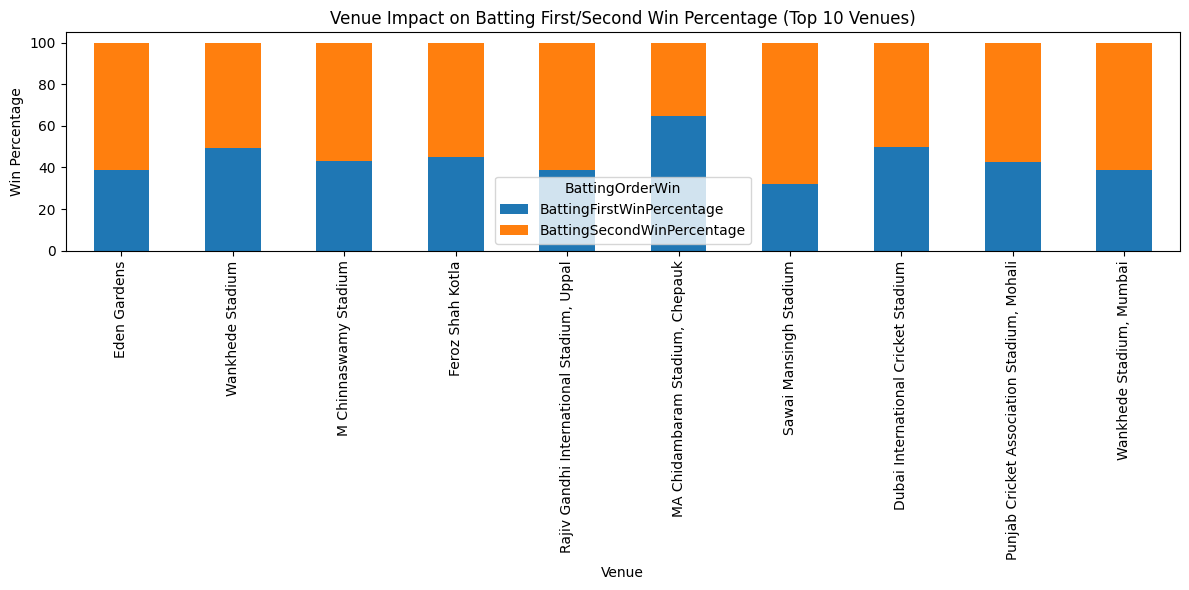

In [20]:
print("\n--- Analysis 2: Venue Impact on Toss Decision Outcomes ---")
venue_toss_impact = ipl_matches_df.groupby(['Venue', 'TossDecision', 'WinningTeam']).size().reset_index(name='Count')

# Determine if the winning team batted first or second
def get_batting_order(row):
    if (row['TossDecision'] == 'bat' and row['TossWinner'] == row['WinningTeam']) or \
       (row['TossDecision'] == 'field' and row['TossWinner'] != row['WinningTeam']):
        return 'BattingFirstWin'
    elif (row['TossDecision'] == 'field' and row['TossWinner'] == row['WinningTeam']) or \
         (row['TossDecision'] == 'bat' and row['TossWinner'] != row['WinningTeam']):
        return 'BattingSecondWin'
    else:
        return 'Unknown' # Should not happen with valid data

ipl_matches_df['BattingOrderWin'] = ipl_matches_df.apply(get_batting_order, axis=1)

venue_batting_outcome = ipl_matches_df.groupby(['Venue', 'BattingOrderWin']).size().reset_index(name='Count')
venue_batting_outcome_pivot = venue_batting_outcome.pivot_table(index='Venue', columns='BattingOrderWin', values='Count').fillna(0)
venue_batting_outcome_pivot['TotalMatches'] = venue_batting_outcome_pivot['BattingFirstWin'] + venue_batting_outcome_pivot['BattingSecondWin']
venue_batting_outcome_pivot['BattingFirstWinPercentage'] = (venue_batting_outcome_pivot['BattingFirstWin'] / venue_batting_outcome_pivot['TotalMatches']) * 100
venue_batting_outcome_pivot['BattingSecondWinPercentage'] = (venue_batting_outcome_pivot['BattingSecondWin'] / venue_batting_outcome_pivot['TotalMatches']) * 100

print(venue_batting_outcome_pivot[['TotalMatches', 'BattingFirstWinPercentage', 'BattingSecondWinPercentage']].sort_values(by='TotalMatches', ascending=False).head(10))

# Visualization for venue impact
top_venues = venue_batting_outcome_pivot.sort_values(by='TotalMatches', ascending=False).head(10).index
venue_impact_plot_df = venue_batting_outcome_pivot.loc[top_venues, ['BattingFirstWinPercentage', 'BattingSecondWinPercentage']]
venue_impact_plot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Venue Impact on Batting First/Second Win Percentage (Top 10 Venues)')
plt.xlabel('Venue')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### **Insights**

*Based on the output of the previous cell:*
 The analysis in the previous cell calculated the win percentage for teams batting first versus teams batting second at different venues. It specifically looked at the top 10 venues based on the total number of matches played.

The key insight drawn is:

**Venue Strategy:** The percentage split between "Batting First Win Percentage" and "Batting Second Win Percentage" for each venue reveals if a particular stadium statistically favors teams setting a target (batting first) or chasing a target (batting second). For instance, a venue with a significantly higher "Batting Second Win Percentage" might suggest that the pitch tends to get easier for batting later in the match or that dew becomes a factor, making it harder for the team bowling second. Conversely, a venue with a higher "Batting First Win Percentage" might indicate that the pitch slows down, making chasing difficult. Teams can use this information to make strategic decisions regarding the toss, especially in venues where the split is significantly skewed towards one outcome. The bar plot visually reinforces these differences across the top venues.

### Analysis 3: Most Consistent Batsman and Bowler

***Question:*** Who are the most consistent performers among batsmen and bowlers, both
 within each team and across the entire league?

***How:*** Consistency can be measured in various ways. For batsmen, we can look at strike rate (runs per ball) and average (runs per innings). For bowlers, we can look at economy rate (runs conceded per over) and strike rate (balls per wicket). Analyzing players with high values in these metrics over a significant number of matches indicates consistency. We can filter by team to find team-specific consistent players.

In [34]:
print("\n--- Analysis 3: Most Consistent Batsman and Bowler ---")

# Consistency for Batsmen (considering players with at least 500 balls faced)
batsman_stats_consistent = player_stats_df[player_stats_df['balls_faced'] >= 500].copy()
batsman_stats_consistent['StrikeRate'] = (batsman_stats_consistent['total_runs'] / batsman_stats_consistent['balls_faced']) * 100
batsman_stats_consistent['Average'] = batsman_stats_consistent['total_runs'] / batsman_stats_consistent['matches_played']
print("\nMost Consistent Batsmen (Overall - Min 500 balls faced by Average):")
print(batsman_stats_consistent.sort_values(by='Average', ascending=False).head(10)[['player', 'matches_played', 'total_runs', 'balls_faced', 'Average', 'StrikeRate']])
print("\nMost Consistent Batsmen (Overall - Min 500 balls faced by Strike Rate):")
print(batsman_stats_consistent.sort_values(by='StrikeRate', ascending=False).head(10)[['player', 'matches_played', 'total_runs', 'balls_faced', 'Average', 'StrikeRate']])


# Consistency for Bowlers (considering players who bowled at least 200 overs)
bowler_stats_consistent = bowler_stats_df[bowler_stats_df['overs'] >= 200].copy()
bowler_stats_consistent['EconomyRate'] = bowler_stats_consistent['total_runs'] / bowler_stats_consistent['overs']
# Calculate bowler strike rate: balls per wicket (total balls / wickets taken)
# Need total balls bowled. Assuming an over is 6 balls for approximation.
bowler_stats_consistent['balls_bowled'] = bowler_stats_consistent['overs'] * 6
bowler_stats_consistent['BowlerStrikeRate'] = bowler_stats_consistent['overs']*6 / bowler_stats_consistent['wickets']
bowler_stats_consistent = bowler_stats_consistent.replace([np.inf, -np.inf], np.nan).dropna(subset=['BowlerStrikeRate']) # Handle division by zero if no wickets

print("\nMost Consistent Bowlers (Overall - Min 200 overs bowled by Economy Rate):")
print(bowler_stats_consistent.sort_values(by='EconomyRate', ascending=True).head(10)[['bowler', 'overs', 'total_runs', 'wickets', 'EconomyRate', 'BowlerStrikeRate']])
print("\nMost Consistent Bowlers (Overall - Min 200 overs bowled by Bowler Strike Rate):")
print(bowler_stats_consistent.sort_values(by='BowlerStrikeRate', ascending=True).head(10)[['bowler', 'overs', 'total_runs', 'wickets', 'EconomyRate', 'BowlerStrikeRate']])


--- Analysis 3: Most Consistent Batsman and Bowler ---

Most Consistent Batsmen (Overall - Min 500 balls faced by Average):
          player  matches_played  total_runs  balls_faced    Average  \
46      KL Rahul              99        3895         2933  39.343434   
562  LMP Simmons              29        1079          878  37.206897   
68     DA Warner             162        5883         4313  36.314815   
23      SE Marsh              69        2489         1913  36.072464   
62      CH Gayle             141        4997         3516  35.439716   
33    JC Buttler              81        2832         1955  34.962963   
574    ML Hayden              32        1107          839   34.59375   
593   MEK Hussey              58        1977         1648  34.086207   
3     RD Gaikwad              36        1207          945  33.527778   
581  JM Bairstow              39        1291          935  33.102564   

     StrikeRate  
46   132.799182  
562  122.892938  
68   136.401577  
23   130.1

### **Insights**

**Insights from Most Consistent Batsman Analysis:**

*   The analysis identified consistent batsmen based on Average (total runs / matches played) and Strike Rate (runs per 100 balls faced) for players who have faced at least 500 balls.
*   Looking at the players with the highest Averages reveals batsmen who consistently score significant runs when they play. These are often the anchor players in a team's batting lineup.
*   Examining players with the highest Strike Rates highlights batsmen who score quickly. These are often the power hitters or finishers who can change the momentum of a match rapidly.
*   Comparing the lists for Average and Strike Rate can reveal different types of consistency. Some players might have a high average but a more moderate strike rate (focusing on building innings), while others might have a lower average but a very high strike rate (focusing on aggressive scoring). Understanding these differences helps in evaluating players' roles and impact on the team.

**Insights from Most Consistent Bowler Analysis:**

*   The analysis identified consistent bowlers based on Economy Rate (runs conceded per over) and Bowler Strike Rate (balls per wicket) for bowlers who have bowled at least 200 overs.
*   Bowlers with low Economy Rates are effective at restricting runs, which is crucial for building pressure and controlling the flow of the game, especially in T20 cricket.
*   Bowlers with low Bowler Strike Rates are effective wicket-takers. These are the bowlers who can break partnerships and change the course of an innings by picking up crucial wickets.
*   Similar to batsmen, comparing the lists for Economy Rate and Bowler Strike Rate reveals different types of bowling consistency. Some bowlers might be very economical but take fewer wickets, while others might be slightly more expensive but are regular wicket-takers. Understanding these metrics helps in evaluating a bowler's effectiveness in different match situations.


Overall, this analysis helps to identify players who have consistently performed well across multiple seasons based on key performance indicators, providing insights into their strengths (scoring runs consistently, scoring quickly, restricting runs, taking wickets).

### **Analysis 4: Most Player of the Matches - The Match Winners**

***Question:*** Which player has won the 'Player of the Match' award the most times throughout the tournament's history?

 ***How:*** By counting the occurrences of each player in the 'Player_of_Match'
 column of the matches data. This directly answers who has been recognized
 as the most impactful player in individual matches most frequently.


--- Analysis 4: Most Player of the Matches ---
           Player  POTM_Awards
0  AB de Villiers           25
1        CH Gayle           22
2       RG Sharma           18
3       DA Warner           18
4        MS Dhoni           17
5       SR Watson           16
6       YK Pathan           16
7         V Kohli           14
8      KA Pollard           14
9        SK Raina           14


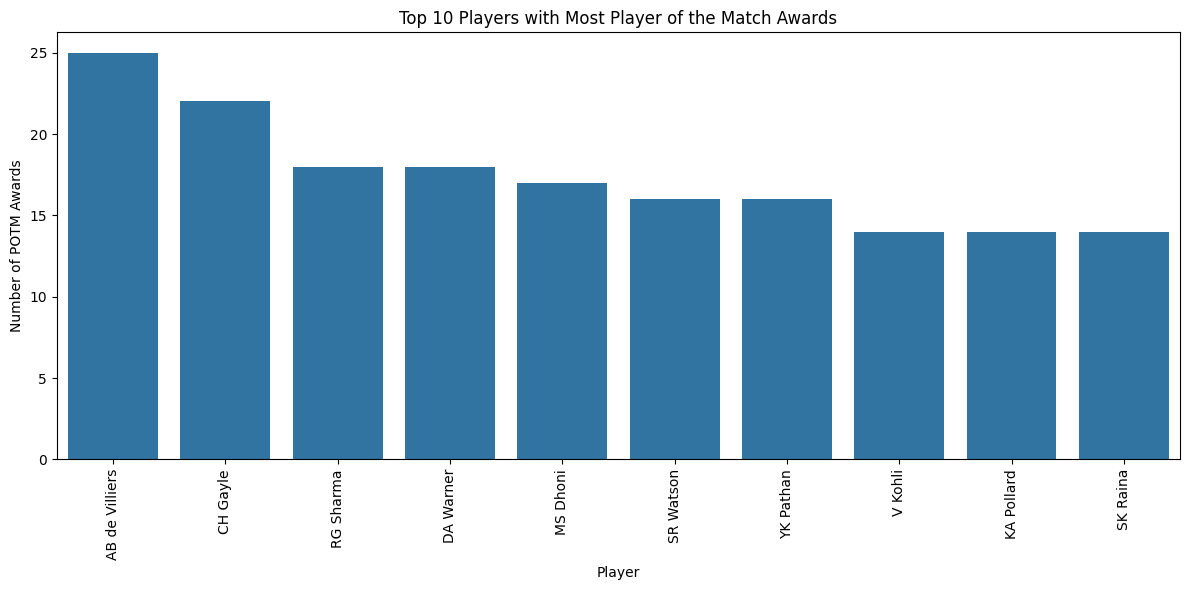

In [35]:
print("\n--- Analysis 4: Most Player of the Matches ---")
most_player_of_match = ipl_matches_df['Player_of_Match'].value_counts().reset_index()
most_player_of_match.columns = ['Player', 'POTM_Awards']
print(most_player_of_match.head(10))

# Visualization for most POTM awards
plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='POTM_Awards', data=most_player_of_match.head(10))
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Number of POTM Awards')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Analysis 5: Predicting Winning Team with Consistency - Beyond Just Wins**

 ***Question:*** Can we predict the winning team by considering not just historical wins but also the consistency of their performance (e.g., average runs scored per match, average wickets taken per match)?

***How:***  This requires a more advanced approach. We would need to calculate consistency metrics for each team (e.g., standard deviation of runs scored, standard deviation of runs conceded). Then, we could build a predictive model (like logistic regression or a machine learning classifier) using these consistency metrics along with historical head-to-head records, venue data, and toss outcomes as features to predict the winner of a future match. This analysis answers which factors related to consistency contribute most to predicting a win.


--- Analysis 5: Predicting Winning Team with Consistency ---
This analysis requires building a predictive model.
Steps would involve:
1. Calculating consistency metrics for each team (e.g., std deviation of runs scored/conceded per match).
2. Engineering features based on team consistency, historical wins, head-to-head records, venue, toss, etc.
3. Splitting the data into training and testing sets.
4. Training a classification model (e.g., Logistic Regression, Random Forest) to predict the WinningTeam.
5. Evaluating the model's performance.
This is a more advanced task requiring significant data preparation and model building.

Average Runs Scored Per Match by Team:
                           Team  AvgRunsPerMatch
0           Chennai Super Kings       160.543269
1               Deccan Chargers           152.84
2                Delhi Capitals       161.031746
3              Delhi Daredevils       150.906832
4                 Gujarat Lions       162.066667
5                Gujarat Titan

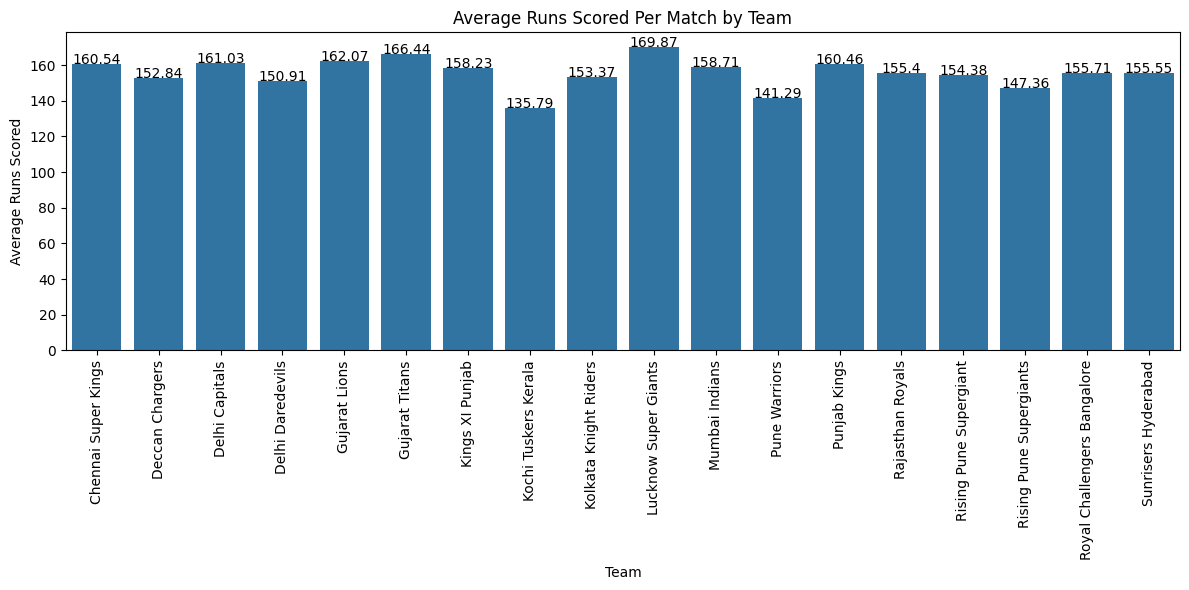

In [40]:
print("\n--- Analysis 5: Predicting Winning Team with Consistency ---")
print("This analysis requires building a predictive model.")
print("Steps would involve:")
print("1. Calculating consistency metrics for each team (e.g., std deviation of runs scored/conceded per match).")
print("2. Engineering features based on team consistency, historical wins, head-to-head records, venue, toss, etc.")
print("3. Splitting the data into training and testing sets.")
print("4. Training a classification model (e.g., Logistic Regression, Random Forest) to predict the WinningTeam.")
print("5. Evaluating the model's performance.")
print("This is a more advanced task requiring significant data preparation and model building.")

# Example of calculating a simple consistency metric (Avg Runs Scored Per Match)
team_runs_per_match = ipl_ball_by_ball_df.groupby(['ID', 'BattingTeam'])['total_run'].sum().reset_index()
avg_runs_per_match = team_runs_per_match.groupby('BattingTeam')['total_run'].mean().reset_index()
avg_runs_per_match.columns = ['Team', 'AvgRunsPerMatch']
print("\nAverage Runs Scored Per Match by Team:")
print(avg_runs_per_match)

plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='AvgRunsPerMatch', data=avg_runs_per_match)


for index, row in avg_runs_per_match.iterrows():
    plt.text(index, row['AvgRunsPerMatch'], round(row['AvgRunsPerMatch'], 2), color='black', ha="center")

plt.title('Average Runs Scored Per Match by Team')
plt.xlabel('Team')
plt.ylabel('Average Runs Scored')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



--- Statistical Analysis: Hypothesis Testing (Example) ---

Contingency Table (Toss Decision vs. Toss Winner Outcome):
TossWinner_Won_Match  False  True 
TossDecision                      
bat                     192    159
field                   269    330

Chi-Squared Test Results:
Chi-Squared Statistic: 8.1092
P-value: 0.0044
Degrees of Freedom: 1

--- Statistical Analysis: ANOVA (Example) ---

ANOVA Table (Total Match Runs by Venue):
                sum_sq     df         F    PR(>F)
C(Venue)  2.400978e+05   48.0  1.648758  0.004199
Residual  2.733473e+06  901.0       NaN       NaN

--- Statistical Analysis: Principal Component Analysis (Example) ---

First 5 rows of PCA results for Bowlers:
   Principal_Component_1  Principal_Component_2             bowler
0              -2.791588               1.358261  M Prasidh Krishna
1              -2.708408               1.267593          KV Sharma
2              -2.504614               0.763706         TG Southee
3              -2.504097  

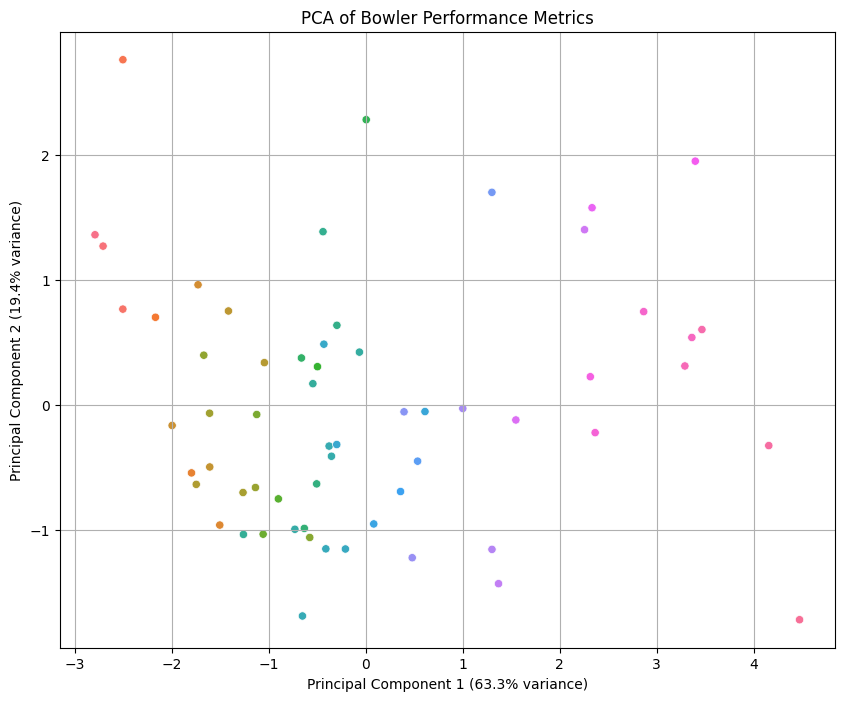


--- Statistical Analysis: Cluster Analysis (Example) ---


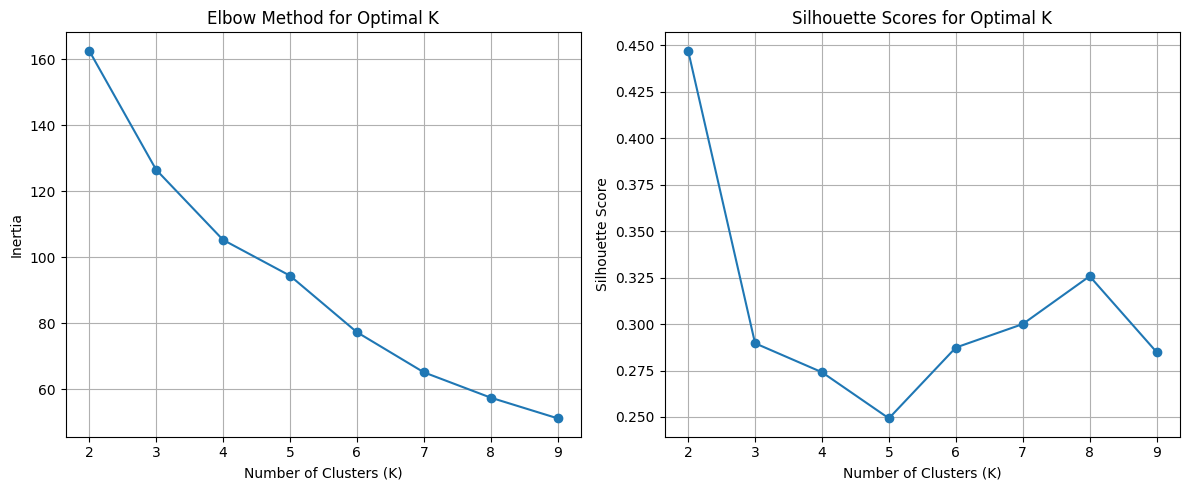


First 10 bowlers with their assigned cluster (K=3):
    bowler  Cluster
378    NaN        0
379    NaN        0
385    NaN        0
386    NaN        0
391    NaN        0
398    NaN        0
406    NaN        1
407    NaN        0
414    NaN        0
415    NaN        0

Mean performance metrics per cluster (K=3):
              overs   total_runs    wickets  EconomyRate  BowlerStrikeRate
Cluster                                                                   
0        254.217647  1961.352941  11.411765     7.747331        138.018926
1        298.203226  2174.451613  19.870968     7.303459         92.726804
2        537.430769  3772.153846  39.230769     7.034009         87.662044


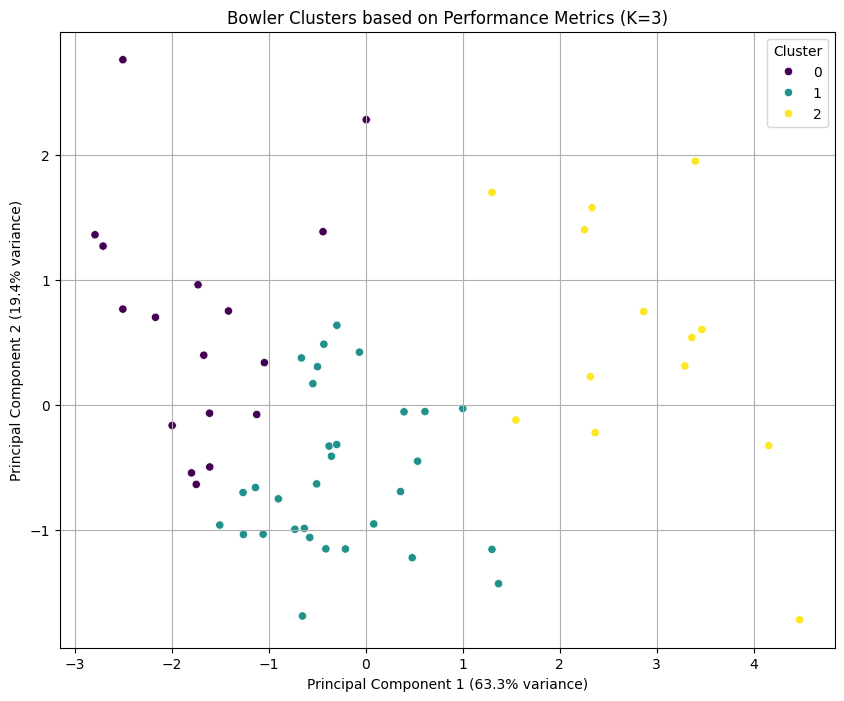


--- Statistical Analysis: Outlier Detection (Example) ---

Batting performance metrics (Avg_Runs_Per_Innings, Batting_Strike_Rate) not found in player_stats_df.


In [53]:
# --- Statistical Analysis  ---


# Interpretation:
# - The coefficients indicate how much the total match runs are expected to change
#   for a one-unit increase in the feature, holding other features constant.
# - TossDecision_Numeric coefficient: A positive value suggests that choosing to bat
#   (TossDecision_Numeric=1) might be associated with slightly higher total runs compared
#   to choosing to field (TossDecision_Numeric=0), holding venue constant.
# - Venue coefficients: Positive coefficients suggest that the total runs are higher
#   at that specific venue compared to the baseline venue (the one dropped during one-hot encoding),
#   holding toss decision constant. Negative coefficients suggest lower runs.
# - R-squared: Indicates the proportion of the variance in Total Match Runs
#   that is predictable from the features used in the model. A low R-squared suggests
#   these features alone don't explain much of the variation, and more factors are needed.

# 4. Hypothesis Testing - Example: Is there a significant difference in win rates between teams batting first vs. second?

print("\n--- Statistical Analysis: Hypothesis Testing (Example) ---")

# We already calculated win percentages by batting order in Analysis 3.
# Let's perform a Chi-Squared test for independence to see if the outcome (Win/Loss for the Toss Winner)
# is independent of the Toss Decision (Bat/Field).
# Note: A better test for batting first vs. chasing win rate might be a proportion z-test,
# but we can structure the data for a Chi-Squared test to demonstrate it.

# Create a contingency table: Toss Decision vs. Win Outcome for Toss Winner
# First, determine if the TossWinner won the match
ipl_matches_df['TossWinner_Won_Match'] = ipl_matches_df['TossWinner'] == ipl_matches_df['WinningTeam']

toss_outcome_contingency = pd.crosstab(ipl_matches_df['TossDecision'], ipl_matches_df['TossWinner_Won_Match'])

print("\nContingency Table (Toss Decision vs. Toss Winner Outcome):")
print(toss_outcome_contingency)

from scipy.stats import chi2_contingency

# Perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(toss_outcome_contingency)

print(f"\nChi-Squared Test Results:")
print(f"Chi-Squared Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies Table:")
# print(expected)

# Interpretation:
# - Null Hypothesis (H0): Toss Decision and Toss Winner Outcome are independent.
# - Alternative Hypothesis (H1): Toss Decision and Toss Winner Outcome are dependent.
# - If the p-value is less than a chosen significance level (e.g., 0.05), we reject the null hypothesis.
#   This would suggest that the toss decision has a statistically significant impact on whether the toss-winning team wins the match.
# - Based on the p-value, state your conclusion regarding the null hypothesis.

# 5. ANOVA (Analysis of Variance) - Example: Is there a significant difference in average total match runs between different venues?

print("\n--- Statistical Analysis: ANOVA (Example) ---")

# We already have 'Total_Match_Runs' and 'Venue' in the match_regression_df.
# ANOVA tests if the means of a quantitative variable are significantly different across two or more groups (categories).
# Here, the quantitative variable is 'Total_Match_Runs', and the groups are 'Venue'.

# To perform ANOVA, we need to group the total runs by venue.
# Let's calculate total runs per match first from the ball-by-ball data and then merge with venue information.
total_runs_per_match = ipl_ball_by_ball_df.groupby('ID')['total_run'].sum().reset_index()
total_runs_per_match.rename(columns={'total_run': 'Total_Match_Runs'}, inplace=True)

# Merge with venue information from ipl_matches_df
match_runs_venue = pd.merge(total_runs_per_match, ipl_matches_df[['ID', 'Venue']], on='ID')

# Perform ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
# OLS (Ordinary Least Squares) model with 'Total_Match_Runs' as the dependent variable and 'Venue' as the independent variable
# C(Venue) indicates that Venue is a categorical variable
model = ols('Total_Match_Runs ~ C(Venue)', data=match_runs_venue).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nANOVA Table (Total Match Runs by Venue):")
print(anova_table)

# Interpretation:
# - The p-value for 'C(Venue)' indicates whether there is a statistically significant
#   difference in the average total match runs across different venues.
# - If the p-value is less than a chosen significance level (e.g., 0.05), we reject the null hypothesis
#   that the average total match runs are the same across all venues.
# - This would suggest that the venue has a statistically significant impact on the total runs scored in a match.


# 6. Principal Component Analysis (PCA) - Example: Exploring variance in bowler performance

print("\n--- Statistical Analysis: Principal Component Analysis (Example) ---")

# PCA is a dimensionality reduction technique. It's useful for exploring relationships
# between variables and potentially creating new, uncorrelated features.
# Let's apply PCA to bowler statistics.

# Select relevant numerical bowling stats and handle potential infinite/NaN values
# Use the bowler_stats_consistent dataframe which includes the calculated metrics
bowler_pca_df = bowler_stats_consistent[['overs', 'total_runs', 'wickets',
                                 'EconomyRate', 'BowlerStrikeRate']].copy()

# Drop rows with NaN or inf values that might result from bowling average/strike rate calculations for bowlers with 0 wickets
bowler_pca_df.replace([np.inf, -np.inf], np.nan, inplace=True)
bowler_pca_df.dropna(inplace=True)

# Ensure there's enough data for PCA
if len(bowler_pca_df) >= 2:
    # Store bowler names before scaling and PCA
    bowler_names = bowler_stats_consistent.loc[bowler_pca_df.index, 'bowler'].reset_index(drop=True)

    # Scale the data before applying PCA (important for PCA)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_bowler_data = scaler.fit_transform(bowler_pca_df)

    # Apply PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2) # Let's reduce to 2 components for visualization
    principal_components = pca.fit_transform(scaled_bowler_data)

    # Create a DataFrame for the principal components
    pca_df = pd.DataFrame(data=principal_components, columns=['Principal_Component_1', 'Principal_Component_2'])

    # Add the bowler names back to pca_df
    pca_df['bowler'] = bowler_names


    print("\nFirst 5 rows of PCA results for Bowlers:")
    print(pca_df.head())

    # Explained variance ratio
    print(f"\nExplained variance ratio by components: {pca.explained_variance_ratio_}")
    print(f"Total explained variance by 2 components: {np.sum(pca.explained_variance_ratio_):.4f}")

    # Visualize the PCA components
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Principal_Component_1', y='Principal_Component_2', data=pca_df, hue='bowler', legend=False) # Added hue for potential clustering visualization later
    plt.title('PCA of Bowler Performance Metrics')
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
    plt.grid(True)
    plt.show()
else:
    print("\nNot enough data points to perform PCA on bowler statistics.")


# Interpretation:
# - PCA identifies dimensions (principal components) that capture the most variance in the data.
# - Principal Component 1 often represents an overall "effectiveness" or "volume" dimension.
# - Principal Component 2 captures another independent dimension of variation (e.g., potentially distinguishing between wicket-takers and economical bowlers).
# - The scatter plot shows how bowlers are distributed in this reduced space. Bowlers close together have similar performance profiles across the chosen metrics.
# - The explained variance ratio tells you how much of the original data's variability is captured by each component.

# 9. Cluster Analysis - Example: Clustering Bowlers based on performance metrics

print("\n--- Statistical Analysis: Cluster Analysis (Example) ---")

# Cluster Analysis groups similar data points. Let's cluster bowlers based on their scaled performance metrics.

# Use the scaled data from the PCA step
# scaled_bowler_data

# Ensure there's enough data for clustering
if len(scaled_bowler_data) >= 2:
    # Determine the optimal number of clusters (e.g., using the Elbow method)
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning) # Suppress KMeans n_init warning

    inertia = []
    silhouette_scores = []
    k_range_values = range(2, min(10, len(scaled_bowler_data))) # Use a different name for the range values

    for k in k_range_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_bowler_data)
        inertia.append(kmeans.inertia_)
        # Calculate silhouette score (requires at least 2 clusters)
        if k > 1:
            score = silhouette_score(scaled_bowler_data, kmeans.labels_)
            silhouette_scores.append(score)

    # Plot the Elbow method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_range_values, inertia, marker='o') # Use the range values for plotting
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.grid(True)

    # Plot the Silhouette scores
    plt.subplot(1, 2, 2)
    # Ensure silhouette_scores is not empty before plotting and use correct x-axis values
    if silhouette_scores:
        # The x-axis values for silhouette scores should correspond to k from 2 up to the max in k_range_values
        silhouette_k_values = range(2, 2 + len(silhouette_scores))
        plt.plot(silhouette_k_values, silhouette_scores, marker='o')
        plt.title('Silhouette Scores for Optimal K')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Silhouette Score')
        plt.grid(True)
    else:
        plt.text(0.5, 0.5, "Not enough clusters (k>1) for Silhouette Score", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

    # Choose a K based on the plots (e.g., where the elbow is, or highest silhouette score)
    # Let's choose K=3 as an example for demonstration (adjust based on the plots)
    # Ensure n_clusters is within the valid range
    n_clusters = min(3, len(scaled_bowler_data) -1) if len(scaled_bowler_data) >= 2 else 0

    if n_clusters > 0:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(scaled_bowler_data)

        # Add cluster labels back to the original bowler_pca_df (which has bowler names)
        # Ensure pca_df and bowler_pca_df have the same index after drops
        bowler_pca_df['Cluster'] = clusters
        # Add bowler names to bowler_pca_df for display
        bowler_pca_df['bowler'] = bowler_names


        print(f"\nFirst 10 bowlers with their assigned cluster (K={n_clusters}):")
        print(bowler_pca_df[['bowler', 'Cluster']].head(10))

        # Analyze the characteristics of each cluster
        print(f"\nMean performance metrics per cluster (K={n_clusters}):")
        cluster_means = bowler_pca_df.groupby('Cluster')[['overs', 'total_runs', 'wickets',
                                                        'EconomyRate', 'BowlerStrikeRate']].mean()
        print(cluster_means)

        # Visualize the clusters using the PCA components
        # Ensure pca_df and bowler_pca_df have the same index after drops
        pca_df_indexed = pca_df.set_index(bowler_pca_df.index)

        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='Principal_Component_1', y='Principal_Component_2', hue='Cluster', data=pd.concat([pca_df_indexed, bowler_pca_df['Cluster']], axis=1), palette='viridis')
        plt.title(f'Bowler Clusters based on Performance Metrics (K={n_clusters})')
        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
        plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
        plt.grid(True)
        plt.show()
    else:
        print("\nNot enough data points to form clusters.")

else:
    print("\nNot enough data points to perform Cluster Analysis on bowler statistics.")


# Interpretation:
# - Cluster analysis groups bowlers with similar statistical profiles.
# - By examining the mean values of metrics within each cluster, you can characterize the types of bowlers in each group (e.g., one cluster might represent economical bowlers, another wicket-takers, another average performers).
# - The scatter plot visualizes these clusters in the reduced PCA space.

# 10. Outlier Detection - Example: Detecting outlier batsmen based on Strike Rate and Average

print("\n--- Statistical Analysis: Outlier Detection (Example) ---")

# Outlier detection identifies data points that are unusually different from others.
# Let's use the Z-score method on Batting Strike Rate and Average for batsmen.
# Z-score measures how many standard deviations a data point is from the mean.
# A common threshold for identifying outliers is |Z-score| > 3.

# Use the player_stats_df with calculated metrics
# Select relevant metrics and handle NaNs/infs
# Ensure 'Avg_Runs_Per_Innings' and 'Batting_Strike_Rate' are calculated or available
# Assuming they were calculated earlier and are available in player_stats_df
if 'Avg_Runs_Per_Innings' in player_stats_df.columns and 'Batting_Strike_Rate' in player_stats_df.columns:
    batsman_outlier_df = player_stats_df[['player', 'Avg_Runs_Per_Innings', 'Batting_Strike_Rate']].copy()
    batsman_outlier_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    batsman_outlier_df.dropna(inplace=True)

    # Ensure there's enough data for standard deviation calculation (avoid single players)
    if len(batsman_outlier_df) > 1:
        # Calculate Z-scores for both metrics
        from scipy import stats
        batsman_outlier_df['Avg_Runs_Per_Innings_ZScore'] = np.abs(stats.zscore(batsman_outlier_df['Avg_Runs_Per_Innings']))
        batsman_outlier_df['Batting_Strike_Rate_ZScore'] = np.abs(stats.zscore(batsman_outlier_df['Batting_Strike_Rate']))

        # Define outlier threshold
        z_score_threshold = 3

        # Identify outliers based on either metric exceeding the threshold
        outliers = batsman_outlier_df[(batsman_outlier_df['Avg_Runs_Per_Innings_ZScore'] > z_score_threshold) |
                                      (batsman_outlier_df['Batting_Strike_Rate_ZScore'] > z_score_threshold)]

        print(f"\nPotential Outlier Batsmen (|Z-score| > {z_score_threshold} for Avg Runs/Innings or Strike Rate):")
        print(outliers[['player', 'Avg_Runs_Per_Innings', 'Avg_Runs_Per_Innings_ZScore',
                         'Batting_Strike_Rate', 'Batting_Strike_Rate_ZScore']])

        # Visualize outliers
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='Avg_Runs_Per_Innings', y='Batting_Strike_Rate', data=batsman_outlier_df, label='All Players')
        sns.scatterplot(x='Avg_Runs_Per_Innings', y='Batting_Strike_Rate', data=outliers, color='red', s=100, label='Outliers')

        # Optionally annotate outlier points
        for i, row in outliers.iterrows():
            plt.annotate(row['player'], (row['Avg_Runs_Per_Innings'], row['Batting_Strike_Rate']), textcoords="offset points", xytext=(0,10), ha='center')


        plt.title('Batsman Average vs. Strike Rate with Outliers')
        plt.xlabel('Average Runs Per Innings')
        plt.ylabel('Batting Strike Rate')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("\nNot enough data points to perform outlier detection using Z-score.")
else:
    print("\nBatting performance metrics (Avg_Runs_Per_Innings, Batting_Strike_Rate) not found in player_stats_df.")


